In [143]:
import requests
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from census import Census
import gmaps
import random
from scipy import stats

api_key = "kV2lYppgddbyaMoNreFR6hxbubjOGddvOoCyFKIG"
api_key2 = "425951fc7a74b45092e6266ba28aec4581a8fee3"
gkey = "wouldn't you like to know"

In [6]:
offense = "simple_assault"
ori = "NJ0111100"
variable = "count"
begin_year = 2018
end_year = 2018

url  = f"https://api.usa.gov/crime/fbi/sapi/api/data/arrest/agencies/offense/{ori}/all/{begin_year}/{end_year}?API_KEY={api_key}"

response = requests.get(url).json()
response

{'results': [{'aggravated_assault': 214,
   'all_other_offenses': 1461,
   'arson': 3,
   'burglary': 67,
   'curfew': 32,
   'disorderly': 111,
   'driving': 106,
   'drug_abuse_gt': 1162,
   'drug_poss_m': 346,
   'drug_poss_opium': 216,
   'drug_poss_other': 3,
   'drug_poss_subtotal': 565,
   'drug_poss_synthetic': 0,
   'drug_sales_m': 30,
   'drug_sales_opium': 566,
   'drug_sales_other': 1,
   'drug_sales_subtotal': 597,
   'drug_sales_synthetic': 0,
   'drunkness': 0,
   'embezzlement': 2,
   'forgery': 1,
   'fraud': 2,
   'g_all': 0,
   'g_b': 3,
   'g_n': 0,
   'g_t': 3,
   'ht_c_s_a': 0,
   'ht_i_s': 0,
   'larceny': 92,
   'liquor': 4,
   'manslaughter': 0,
   'mvt': 0,
   'murder': 8,
   'offense_family': 7,
   'prostitution': 19,
   'prostitution_a_p_p': 0,
   'prostitution_p': 10,
   'prostitution_p_p': 0,
   'rape': 6,
   'robbery': 70,
   'sex_offense': 12,
   'simple_assault': 652,
   'stolen_property': 125,
   'suspicion': 0,
   'vagrancy': 0,
   'vandalism': 22,
  

In [13]:
assaults_response = response["results"][0]["simple_assault"]
assaults_response

652

In [63]:
simple_assault_cases = []
stolen_property_cases = []
rape_cases = []
ori_list = ["AL0030100",
            "AK0010300",
            "AZ0072300",
            "AR0600200",
            "CA0340400",
            "CODPD0000",
            "CT0006400",
            "DE0010100",
            "FL0370300",
            "GAAPD0000",
            "HI0020000",
            "ID0010100",
            "IL0840200",
            "INIPD0000",
            "IA0770300",
            "KS0890100",
            "KY0370100",
            "LA0170200",
            "ME0060100",
            "MD0020100",
            "MA0130100",
            "MI3351900",
            "MN0620900",
            "MS0250100",
            "MO0260100",
            "MT0250100",
            "NB0550100",
            "NV0130000",
            "NH0071600",
            "NJ0111100",
            "NM0260100",
            "NY0010100",
            "NC0920100",
            "ND0080100",
            "OHCOP0000",
            "OK0550400",
            "OR0240200",
            "PA0220200",
            "RI0010200",
            "SC0400100",
            "SD0320100",
            "TN0190100",
            "TX2270100",
            "UT0180300",
            "VT0120200",
            "VA1220000",
            "WA0340100",
            "WV0200200",
            "WI0130100",
            "WY0110100"
            ]

for ori2 in range(len(ori_list)):
    response2 = requests.get(f"https://api.usa.gov/crime/fbi/sapi/api/data/arrest/agencies/offense/{ori_list[ori2]}/all/{begin_year}/{end_year}?API_KEY={api_key}").json()
    try:
        simple_assault_cases.append(response2["results"][0]["simple_assault"])
        stolen_property_cases.append(response2["results"][0]["stolen_property"])
        rape_cases.append(response2["results"][0]["rape"])
    except IndexError:
        simple_assault_cases.append(np.nan)
        stolen_property_cases.append(np.nan)
        rape_cases.append(np.nan)
    # Printing queries
    print(f"Processing record {ori2 + 1}")

print("------")
print("Done")
print("------")

Processing record 1
Processing record 2
Processing record 3
Processing record 4
Processing record 5
Processing record 6
Processing record 7
Processing record 8
Processing record 9
Processing record 10
Processing record 11
Processing record 12
Processing record 13
Processing record 14
Processing record 15
Processing record 16
Processing record 17
Processing record 18
Processing record 19
Processing record 20
Processing record 21
Processing record 22
Processing record 23
Processing record 24
Processing record 25
Processing record 26
Processing record 27
Processing record 28
Processing record 29
Processing record 30
Processing record 31
Processing record 32
Processing record 33
Processing record 34
Processing record 35
Processing record 36
Processing record 37
Processing record 38
Processing record 39
Processing record 40
Processing record 41
Processing record 42
Processing record 43
Processing record 44
Processing record 45
Processing record 46
Processing record 47
Processing record 48
P

In [59]:
print(simple_assault_cases)

[652, 66, 234, nan, 406, 1966, 417, 630, 261]


In [60]:
print(stolen_property_cases)

[125, 43, 35, nan, 53, 139, 34, 37, 38]


In [61]:
print(rape_cases)

[6, 3, 9, nan, 7, 53, 3, 18, 22]


In [64]:
df=pd.DataFrame(list(zip(ori_list, rape_cases, simple_assault_cases, stolen_property_cases)), 
               columns = ['Police Department', "Rape Cases", "Simple Assault Cases", "Stolen Property Cases"])
df

,Police Department,Rape Cases,Simple Assault Cases,Stolen Property Cases
0,AL0030100,3.0,102.0,13.0
1,AK0010300,5.0,291.0,4.0
2,AZ0072300,103.0,5726.0,364.0
3,AR0600200,28.0,947.0,291.0
4,CA0340400,30.0,1309.0,281.0
5,CODPD0000,143.0,3435.0,132.0
6,CT0006400,17.0,1780.0,9.0
7,DE0010100,5.0,512.0,26.0
8,FL0370300,NaN,NaN,NaN
9,GAAPD0000,NaN,NaN,NaN


In [55]:
# Census & gmaps API Keys
c = Census(api_key2, year=2018)

In [73]:
#Code used from in-class instructor presentation
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head(54)

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,27,Minnesota,5527358.0,37.9,68411.0,36245.0,547442.0,9.904225,2.156871
1,28,Mississippi,2988762.0,37.2,43567.0,23434.0,599795.0,20.068343,3.681658
2,29,Missouri,6090062.0,38.5,53560.0,29537.0,837930.0,13.758973,2.560861
3,30,Montana,1041732.0,39.8,52559.0,29765.0,139063.0,13.349211,2.153433
4,31,Nebraska,1904760.0,36.4,59116.0,31101.0,213790.0,11.223986,1.918614
5,32,Nevada,2922849.0,37.9,57598.0,29961.0,393431.0,13.460531,3.481124
6,33,New Hampshire,1343622.0,42.7,74057.0,38548.0,102352.0,7.617619,2.261946
7,34,New Jersey,8881845.0,39.8,79363.0,40895.0,904132.0,10.179552,3.209739
8,35,New Mexico,2092434.0,37.5,48059.0,26085.0,410389.0,19.612996,3.267487
9,36,New York,19618453.0,38.7,65323.0,37470.0,2797985.0,14.262006,3.071781


In [65]:
ori_list3 =["AL0030100",
           "AK0010300",
           "AZ0072300",
           "AR0600200",
           "CA0340400",
           "CODPD0000",
           "CT0006400",
           "DE0010100",
           "FL0370300",
           "GAAPD0000"
           ]
female =[]
male =[]
begin_year = 2018
end_year = 2018
print("Beginning Data Retrieval")
print("------------------------")
for ori in range(len(ori_list)):
    response = requests.get(f"https://api.usa.gov/crime/fbi/sapi/api/police-employment/agencies/{ori_list[ori]}/{begin_year}/{end_year}?API_KEY={api_key}").json()
    #print(response)
    try:
        print(f"Processing record {ori + 1}")
        female.append(response["results"][0]["female_officer_ct"])
        male.append(response["results"][0]["male_officer_ct"])
    except:
        print("Not found")
        pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing record 1
Processing record 2
Processing record 3
Processing record 4
Processing record 5
Processing record 6
Processing record 7
Processing record 8
Processing record 9
Processing record 10
Processing record 11
Processing record 12
Processing record 13
Processing record 14
Processing record 15
Processing record 16
Processing record 17
Processing record 18
Processing record 19
Processing record 20
Processing record 21
Processing record 22
Processing record 23
Processing record 24
Processing record 25
Processing record 26
Processing record 27
Processing record 28
Processing record 29
Processing record 30
Processing record 31
Processing record 32
Processing record 33
Processing record 34
Processing record 35
Processing record 36
Processing record 37
Processing record 38
Processing record 39
Processing record 40
Processing record 41
Processing record 42
Processing record 43
Processing record 44
Processing record 45
Processing rec

In [71]:
# codes for creating dataframe
officer_df = pd.DataFrame({"Police Department": ori_list, "Male Officers": male, "Female Officers" : female})
officer_df["Total Number"]=officer_df["Male Officers"]+officer_df["Female Officers"]

In [72]:
officer_df.head(51)

,Police Department,Male Officers,Female Officers,Total Number
0,AL0030100,380.0,94.0,474.0
1,AK0010300,42.0,5.0,47.0
2,AZ0072300,2524.0,395.0,2919.0
3,AR0600200,475.0,100.0,575.0
4,CA0340400,549.0,102.0,651.0
5,CODPD0000,1309.0,208.0,1517.0
6,CT0006400,346.0,48.0,394.0
7,DE0010100,95.0,6.0,101.0
8,FL0370300,309.0,68.0,377.0
9,GAAPD0000,1283.0,252.0,1535.0


In [120]:
file = "Final Data File v2.csv"
file_df = pd.read_csv(file)
file_df.head(51)

,State,State Ab.,State Capital,Population,ORI Code,No. of Officers,Year of Data,No. of Rapes,No. of Simple Assaults,No. of Stolen Property Cases,Total Crimes,School Ratings,Unemployment Rate,Avg. Income,"Crimes(R,SA,SP) Per Citizen"
0,ALABAMA,AL,Montgomery,"198,525",AL0030100,474,2018,3,102,13,118,4.35,3.04,48486,0.000594
1,ALASKA,AK,Juneau,"32,113",AK0010300,47,2018,5,291,4,300,6.50,3.80,76715,0.009342
2,ARIZONA,AZ,Phoenix,"1,680,992",AZ0072300,2919,2018,103,5726,364,6193,4.72,3.03,56213,0.003684
3,ARKANSAS,AR,Little Rock,"197,312",AR0600200,575,2018,28,947,291,1266,3.64,2.53,45726,0.006416
4,CALIFORNIA,CA,Sacramento,"513,624",CA0340400,651,2018,30,1309,281,1620,4.63,3.38,71228,0.003154
5,COLORADO,CO,Denver,"727,211",CODPD0000,1517,2018,143,3435,132,3710,3.75,2.52,68811,0.005102
6,CONNECTICUT,CT,Hartford,"122,105",CT0006400,394,2018,17,1780,9,1806,2.80,3.52,76106,0.014791
7,DELAWARE,DE,Dover,"38,079",DE0010100,101,2018,5,512,26,543,0.00,3.00,65627,0.014260
8,FLORIDA,FL,Tallahassee,"194,500",FL0370300,377,2017,45,713,8,766,5.00,3.02,53267,0.003938
9,GEORGIA,GA,Atlanta,"506,811",GAAPD0000,1535,2017,45,2144,511,2700,3.85,3.14,55679,0.005327


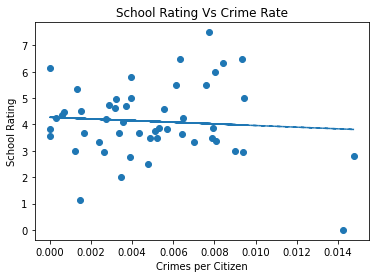

In [159]:
school_ratings = file_df.iloc[:,11]
crime_rate = file_df.iloc[:,14]
sr_slope, sr_int, sr_r, sr_p, sr_std_err = stats.linregress(crime_rate, school_ratings) 
sr_fit = sr_slope * crime_rate + sr_int
plt.scatter(crime_rate,school_ratings)
plt.plot(crime_rate,sr_fit,"--")
plt.ylabel('School Rating')
plt.xlabel('Crimes per Citizen')
plt.title('School Rating Vs Crime Rate')
print(f" The correlation between both factors is {round(correlation[0],2)}"")
plt.show()

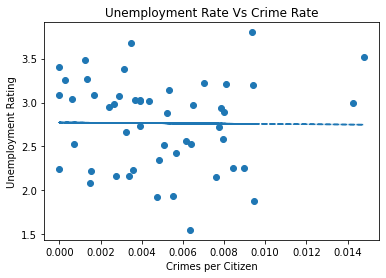

In [160]:
unemployment_ratings = file_df.iloc[:,12]
crime_rate = file_df.iloc[:,14]
ur_slope, ur_int, ur_r, ur_p, ur_std_err = stats.linregress(crime_rate, unemployment_ratings) 
ur_fit = ur_slope * crime_rate + ur_int
plt.scatter(crime_rate,  unemployment_ratings)
plt.plot(crime_rate,ur_fit,"--")
plt.ylabel('Unemployment Rating')
plt.xlabel('Crimes per Citizen')
plt.title('Unemployment Rate Vs Crime Rate')
plt.show()

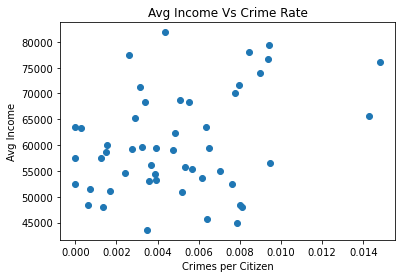

In [154]:
avg_income_ratings = file_df.iloc[:,13]
crime_rate = file_df.iloc[:,14]
plt.scatter(crime_rate, avg_income_ratings)
plt.ylabel('Avg Income')
plt.xlabel('Crimes per Citizen')
plt.title('Avg Income Vs Crime Rate')
plt.show()

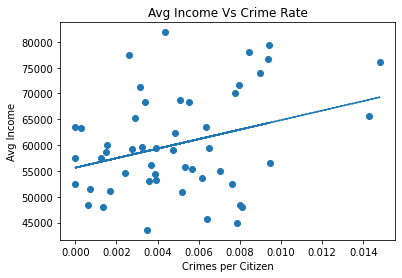

In [161]:
avg_income_ratings = file_df.iloc[:,13]
crime_rate = file_df.iloc[:,14]
ai_slope, ai_int, ai_r, ai_p, ai_std_err = stats.linregress(crime_rate, avg_income_ratings) 
ai_fit = ai_slope * crime_rate + ai_int
plt.scatter(crime_rate,avg_income_ratings)
plt.plot(crime_rate,cr_fit,"--")
plt.ylabel('Avg Income')
plt.xlabel('Crimes per Citizen')
plt.title('Avg Income Vs Crime Rate')
plt.show()

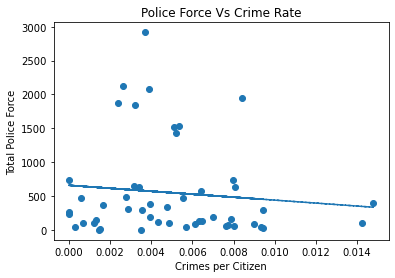

In [169]:
total_police = file_df.iloc[:,5]
crime_rate = file_df.iloc[:,14]
or_slope, or_int, or_r, or_p, or_std_err = stats.linregress(crime_rate, total_police) 
or_fit = or_slope * crime_rate + or_int
plt.scatter(crime_rate,total_police)
plt.plot(crime_rate,or_fit,"--")
plt.ylabel('Total Police Force')
plt.xlabel('Crimes per Citizen')
plt.title('Police Force Vs Crime Rate')
plt.show()

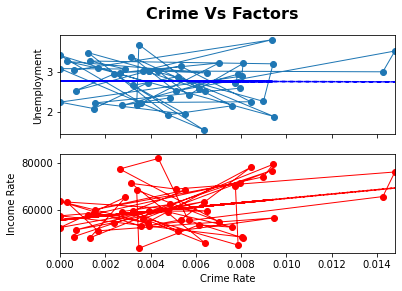

In [166]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Crime Vs Factors", fontsize=16, fontweight="bold")

ax1.set_xlim(min(crime_rate), max(crime_rate))
ax1.plot(crime_rate, unemployment_ratings, linewidth=1, marker="o")
ax1.plot(crime_rate, ur_fit, "b--")
ax1.set_ylabel("Unemployment")

ax2.plot(crime_rate, avg_income_ratings, linewidth=1, marker="o", color="r")
ax2.plot(crime_rate, ai_fit, "r--")
ax2.set_ylabel("Income Rate")
ax2.set_xlabel("Crime Rate")

plt.show()

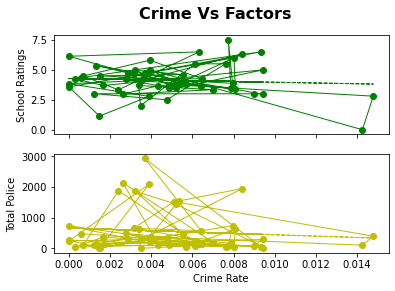

In [167]:
fig, (ax3, ax4) = plt.subplots(2, sharex=True)
fig.suptitle("Crime Vs Factors", fontsize=16, fontweight="bold")

ax3.plot(crime_rate, school_ratings, linewidth=1, marker="o", color="g")
ax3.plot(crime_rate, sr_fit, "g--", linewidth=1)
ax3.set_ylabel("School Ratings")

ax4.plot(crime_rate, total_police, linewidth=1, marker="o", color="y")
ax4.plot(crime_rate, or_fit, "y--", linewidth=1)
ax4.set_ylabel("Total Police")
ax4.set_xlabel("Crime Rate")

plt.show()

In [173]:
school_ratings = file_df.iloc[:,11]
unemployment_ratings = file_df.iloc[:,12]
avg_income_ratings = file_df.iloc[:,13]
total_police = file_df.iloc[:,5]
crime_rate = file_df.iloc[:,14]
correlation_sr = stats.pearsonr(school_ratings,crime_rate)
correlation_ur = stats.pearsonr(unemployment_ratings,crime_rate)
correlation_pf = stats.pearsonr(total_police,crime_rate)
correlation_ai = stats.pearsonr(avg_income_ratings,crime_rate)
print(f" The correlation between School Ratings & Crime Rate is {round(correlation_sr[0],2)}")
print(f" The correlation between Unemployment Rate & Crime Rate is {round(correlation_ur[0],2)}")
print(f" The correlation between Police Force & Crime Rate is {round(correlation_pf[0],2)}")
print(f" The correlation between Avg. Incomes & Crime Rate is {round(correlation_ai[0],2)}")

 The correlation between School Ratings & Crime Rate is -0.08
 The correlation between Unemployment Rate & Crime Rate is -0.01
 The correlation between Police Force & Crime Rate is -0.11
 The correlation between Avg. Incomes & Crime Rate is 0.32
